<img src='11.jpg'>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e23/train.csv")
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [3]:
df.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [11]:
#pip install pycaret

In [5]:
from pycaret.classification import*

In [6]:
setup(df,target='defects')

,Description,Value
0,Session id,4822
1,Target,defects
2,Target type,Binary
3,Original data shape,"(101763, 23)"
4,Transformed data shape,"(101763, 23)"
5,Transformed train set shape,"(71234, 23)"
6,Transformed test set shape,"(30529, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8155,0.7907,0.3931,0.6551,0.4913,0.3872,0.4060,8.8630
lightgbm,Light Gradient Boosting Machine,0.8150,0.7898,0.3851,0.6566,0.4854,0.3818,0.4021,2.3720
ada,Ada Boost Classifier,0.8140,0.7885,0.3766,0.6565,0.4784,0.3752,0.3968,2.3070
rf,Random Forest Classifier,0.8109,0.7726,0.3747,0.6422,0.4732,0.3676,0.3874,9.2550
et,Extra Trees Classifier,0.8102,0.7721,0.3719,0.6400,0.4704,0.3645,0.3845,5.6690
xgboost,Extreme Gradient Boosting,0.8100,0.7794,0.3783,0.6358,0.4743,0.3674,0.3858,0.7060
lda,Linear Discriminant Analysis,0.8040,0.7768,0.2348,0.7022,0.3518,0.2688,0.3252,0.1740
lr,Logistic Regression,0.8009,0.6841,0.2688,0.6464,0.3797,0.2844,0.3234,1.4880
nb,Naive Bayes,0.8003,0.7698,0.2353,0.6693,0.3481,0.2609,0.3110,0.0750
qda,Quadratic Discriminant Analysis,0.7987,0.7623,0.2312,0.6594,0.3422,0.2545,0.3036,0.1010


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4822, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
best_model=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8160,0.7844,0.3870,0.6607,0.4881,0.3851,0.4056
1,0.8137,0.7911,0.3957,0.6455,0.4906,0.3845,0.4018
2,0.8151,0.7944,0.3975,0.6511,0.4937,0.3886,0.4063
3,0.8217,0.7984,0.4074,0.6777,0.5089,0.4081,0.4279
4,0.8171,0.7963,0.3885,0.6649,0.4904,0.3882,0.4090
5,0.8159,0.7943,0.3916,0.6576,0.4909,0.3872,0.4066
6,0.8099,0.7815,0.3730,0.6377,0.4707,0.3644,0.3839
7,0.8178,0.7912,0.3978,0.6632,0.4973,0.3944,0.4136
8,0.8143,0.7951,0.3934,0.6486,0.4898,0.3845,0.4024


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

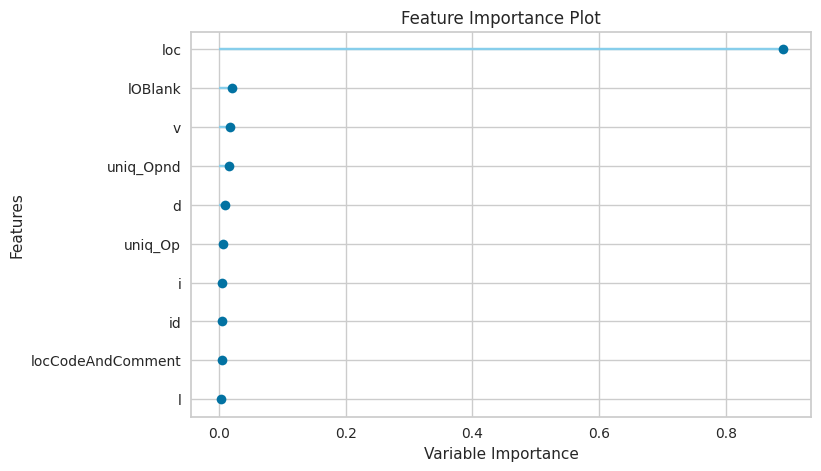

In [9]:
plot_model(best_model,plot='feature')

In [10]:
#BURAYA KADAR AUTO ML İLE ÇÖZDÜK VE %81,55 ORANINDA DORU TAHMİN ELDE ETTİK
#DEEP LEARNİNG İLE DE ÇÖZMEYE ÇALIŞALIM

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [14]:
x=df.drop('defects',axis=1)
y=df['defects']

In [16]:
df["defects"].unique()

array([False,  True])

In [15]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model=Sequential()
model.add(Dense(8,activation='relu')) #sütun sayısı 8 olduğu için 8 ie başladık.8 nörona bağladık demektir
model.add(Dense(120,activation='relu')) #120 nörona bağladık
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #sigmoid = sonucu 1 veya 0 olacağı için bu aktivasyon kodu kullandık
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

#entropy=kaos
#adam= fonksiyon  duruma göre atacağı adımları ayarlıyor
#accuracy= classification da başarı oranı
#r2=rgression da başarı oranı
#siluette score= clustring başarı oranı
#loss=gerçek değer ile tahmin edilen arasındaki fark büyükse bu katsayıları update ederek hatayı 0 a  eşitlemeye çalışıyor

# autokeras.com ile hepsni otomatik olarak kendi yapıyor

In [29]:
model.fit(x,y,epochs=100,validation_split=.20,batch_size=32,verbose=1)

#validation_split=.20  bu kon train_test_spliti otomatik yapıyor

Epoch 1/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.5345 - accuracy: 0.7740 - val_loss: 0.5383 - val_accuracy: 0.7709
Epoch 2/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.5345 - accuracy: 0.7740 - val_loss: 0.5382 - val_accuracy: 0.7709
Epoch 3/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.5345 - accuracy: 0.7740 - val_loss: 0.5382 - val_accuracy: 0.7709
Epoch 4/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.5345 - accuracy: 0.7740 - val_loss: 0.5382 - val_accuracy: 0.7709
Epoch 5/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.5345 - accuracy: 0.7740 - val_loss: 0.5382 - val_accuracy: 0.7709
Epoch 6/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.5345 - accuracy: 0.7740 - val_loss: 0.5383 - val_accuracy: 0.7709
Epoch 7/100
2545/2545 [==============================] - 6s 2ms/step - loss: 0.5345 - accuracy: 0.7740 - val_loss: 0.5382 - val_ac

In [30]:
score=model.evaluate(x,y)

3181/3181 [==============================] - 4s 1ms/step - loss: 0.5352 - accuracy: 0.7734


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 184       
                                                                 
 dense_7 (Dense)             (None, 120)               1080      
                                                                 
 dense_8 (Dense)             (None, 64)                7744      
                                                                 
 dense_9 (Dense)             (None, 6)                 390       
                                                                 
 dense_10 (Dense)            (None, 2)                 14        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9415 (36.78 KB)
Trainable params: 9415 (

In [ ]:
#DEEP LEARNİNG İLE FARKLI DENEMELERDE AYNI SONUÇ ÇIKTI. HATALI BİR YER OLABİLİR.